## Regularization test simulation

In [2]:
%matplotlib inline

In [3]:
import os, sys
os.chdir("/Users/njchiang/GitHub/tikhonov")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tikhonov import TikhonovRegression as tik
from sklearn.linear_model import Ridge, LinearRegression

## Simple 3 feature example

In [5]:
def generate_x_y(b, n_samples, testprop):
    n = np.floor(n_samples * testprop).astype(int)
    n_test = n_samples - n
    nf = len(b)
    x = np.random.rand(n, nf)
    x_test = np.random.rand(n_test, nf)
    x = x - x.mean(0)
    x_test = x_test - x_test.mean(0)
    y = np.dot(x, b) + np.random.randn(n)/10
    y_test = np.dot(x_test, b) + np.random.randn(n_test)/10
    return x, y, x_test, y_test

In [6]:
def generate_betas(sigma):
    return np.random.multivariate_normal(np.zeros(sigma.shape[0]), sigma)


In [7]:
def pred_test(y_test, x_test, est_betas):
    pred = np.dot(x_test, est_betas)
    return np.corrcoef(y_test, pred)[0,1]

In [8]:
Sigma = np.array([[1, 0, .5], [0, 1, .5], [.5, .5, 1]])


In [9]:
ols = LinearRegression(fit_intercept=False)
ridge = Ridge(fit_intercept=False)

In [10]:
def get_coefs(x, y, sigma):
    est_ols = ols.fit(x, y).coef_
    est_ridge = ridge.fit(x, y).coef_
    est_tik = tik.analytic_tikhonov(x, y, ridge.alpha, sigma)
    return np.array([est_ols, est_ridge, est_tik])

In [18]:
def compare_ests(ests):
    # MIGHT NEED TO BE TRANSPOSED
    f = plt.imshow(np.corrcoef(ests), vmin=0, vmax=1)
    plt.colorbar()

In [19]:
def run_iter(sigma):
    b = generate_betas(sigma)
    x, y, x_test, y_test = generate_x_y(b, 100, .2)
    ests = get_coefs(x, y, sigma)
    compare_ests(np.vstack([b, ests]))

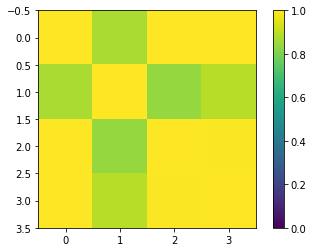

In [20]:
run_iter(Sigma)

### Regression testing

In [ ]:
est_ols = ols.fit(x, y).coef_
est_ridge = ridge.fit(x, y).coef_
tik_est_ridge = tik.analytic_tikhonov(x, y, 1, np.eye(nf))
tik_analytic = tik.analytic_tikhonov(x, y, 1, Sigma)

In [ ]:
gamma = tik.find_gamma(Sigma)
x_new, y_new = tik.to_standard_form(x, y, gamma)
tik_est_standard = ridge.fit(x_new, y_new).coef_
est_tik = tik.to_general_form(tik_est_standard, x, y, gamma)

## Scratch

In [17]:
np.vstack([b, ests])

NameError: name 'b' is not defined

In [ ]:
eps = 1e-10
print("Tik-Ridge ~= Ridge: {}".format(np.sum(tik_est_ridge-est_ridge)<eps))
print("Tik-Est ~= Tik-Analytic: {}".format(np.sum(est_tik - tik_analytic) < eps))


In [ ]:
compare_ests(b, est_ols, est_ridge, est_tik)

In [ ]:
print("Actual: {}\nOLS: {}\n Ridge: {}\n Tik: {}".format(
    pred_test(y_test, x_test, b),
    pred_test(y_test, x_test, est_ols),
    pred_test(y_test, x_test, est_ridge),
    pred_test(y_test, x_test, est_tik)))

## Bigger example

In [ ]:
n = 100  # OLS should outperform
n_test = 100 # amount to predict
nf = 300
random_features = np.random.rand(nf, nf)
Sigma = np.corrcoef(random_features)


In [ ]:
x = np.random.rand(n, nf)
x_test = np.random.rand(n_test, nf)
b = np.random.multivariate_normal(np.zeros(nf), Sigma)
x = x - x.mean(0)
x_test = x_test - x_test.mean(0)
y = np.dot(x, b) + np.random.randn(n)/10
y_test = np.dot(x_test, b) + np.random.randn(n_test)/10

In [ ]:
est_ols = ols.fit(x, y).coef_
est_ridge = ridge.fit(x, y).coef_
tik_est_ridge = tik.analytic_tikhonov(x, y, 1, np.eye(nf))
est_tik = tik.analytic_tikhonov(x, y, 1, Sigma)


In [ ]:
# Broken... Sigma is not positive definite...
# gamma = tik.find_gamma(Sigma)
# x_new, y_new = tik.to_standard_form(x, y, gamma)
# tik_est_standard = ridge.fit(x_new, y_new).coef_
# est_tik = tik.to_general_form(tik_est_standard, x, y, gamma)

In [ ]:
print("Test correlation:\n Actual: {}\n OLS: {}\n Ridge: {}\n Tik: {}".format(
        pred_test(y_test, x_test, b),
        pred_test(y_test, x_test, est_ols),
        pred_test(y_test, x_test, est_ridge),
        pred_test(y_test, x_test, est_tik)))

In [ ]:
compare_ests(b, est_ols, est_ridge, est_tik)